In [19]:
import pandas                as     pd
import matplotlib.pyplot     as     plt
import seaborn               as     sns
import numpy                 as     np
import matplotlib.cm         as     cm
from   sklearn.cluster       import KMeans
from   sklearn.decomposition import PCA
from   sklearn.preprocessing import StandardScaler
from   sklearn.metrics       import silhouette_samples, silhouette_score

In [9]:
df = pd.read_csv("data-500k/data.csv")
X = df[df.columns[:-1]]

In [3]:
km_elkan = []

for i in range(2, 16):
    km_elkan.append(KMeans(n_clusters=i, algorithm='elkan', n_init=7))

In [4]:
y_elkan = []

for i in range(14):
    y_elkan.append(km_elkan[i].fit_predict(X))

In [5]:
sscore = []
for i in range(14):
    sscore.append(km_elkan[i].inertia_)

In [6]:
print(min(sscore))

543615.4786106544


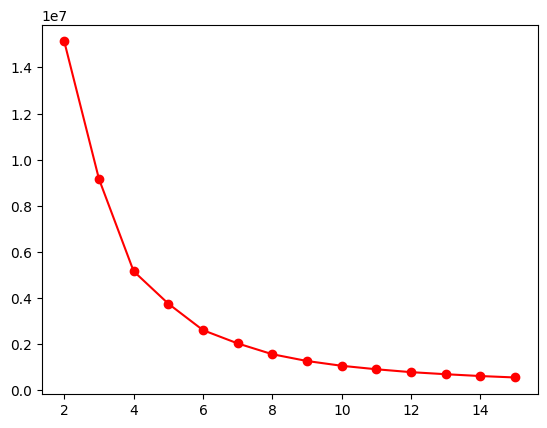

In [7]:
plt.plot(range(2, 16), sscore, 'o-r')

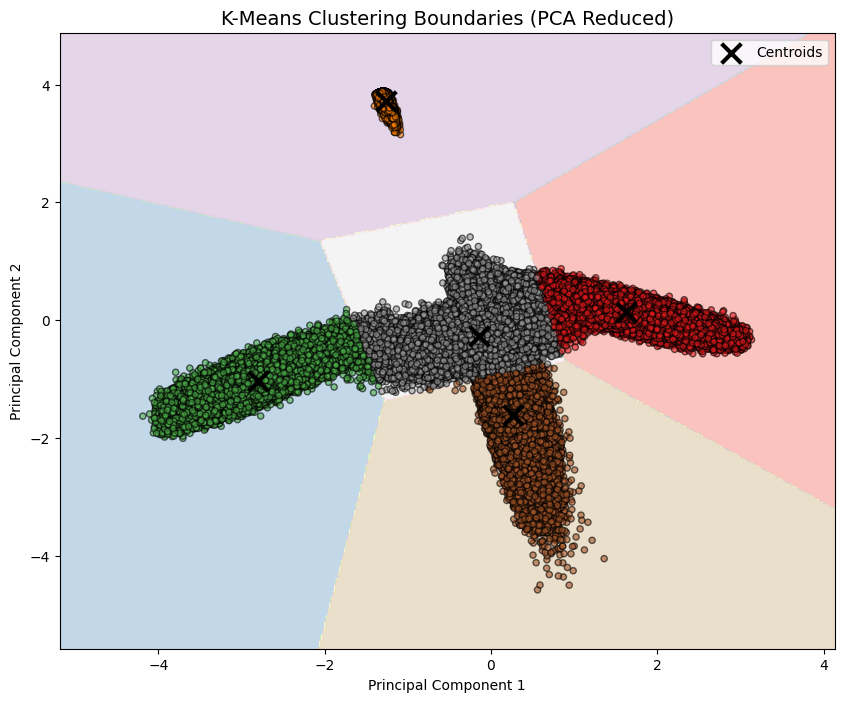

In [15]:
y_true = df['status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_pca)

h = 0.02 
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

plt.contourf(xx, yy, Z, alpha=0.8)

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, edgecolors='k', s=20, alpha=0.6)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='black', label='Centroids')

plt.title('K-Means Clustering Boundaries (PCA Reduced)', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(False)

plt.show()

In [16]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg:.3f}")



For n_clusters = 5, the average silhouette_score is : 0.610


NameError: name 'silhouette_samples' is not defined

NameError: name 'cm' is not defined

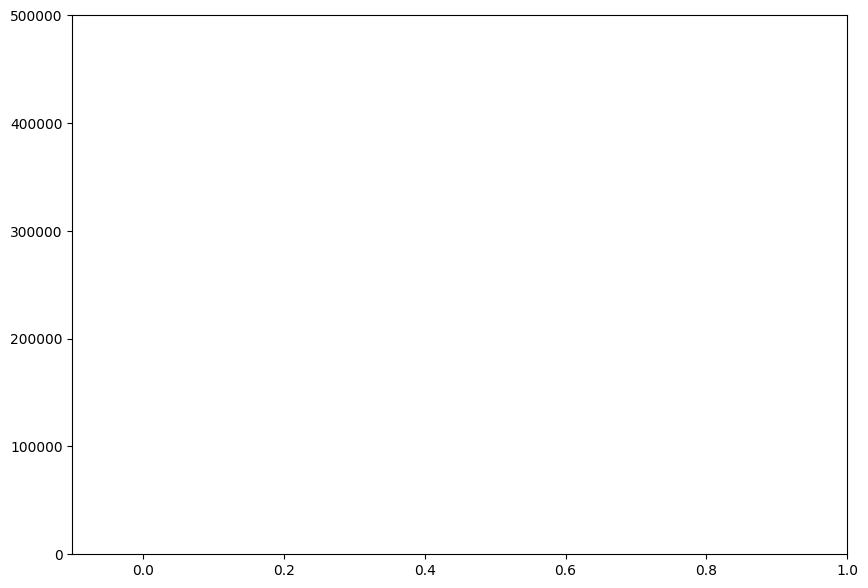

In [18]:
sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)




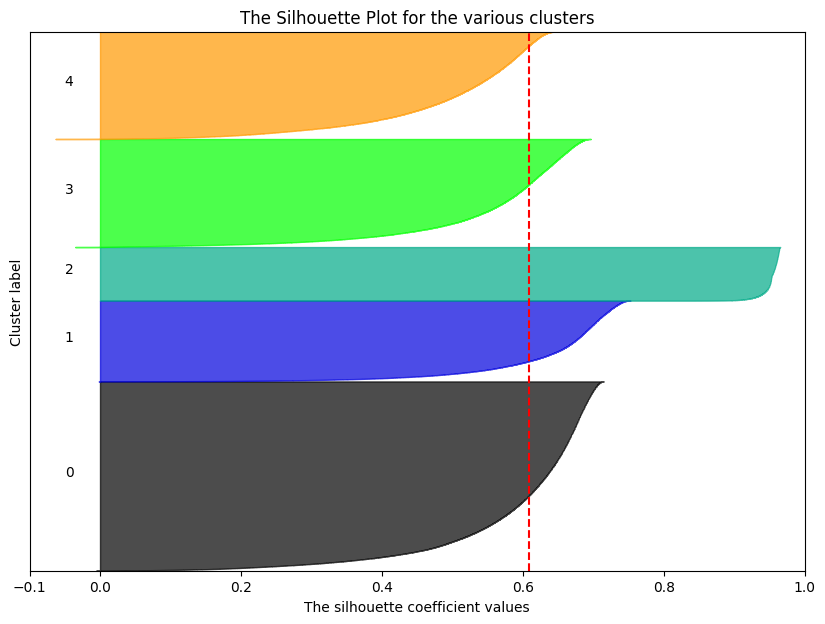

In [25]:
fig, ax1 = plt.subplots(figsize=(10, 7))

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10

ax1.set_title("The Silhouette Plot for the various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.savefig("silhouette_plot.jpg")
plt.show()

<Figure size 640x480 with 0 Axes>